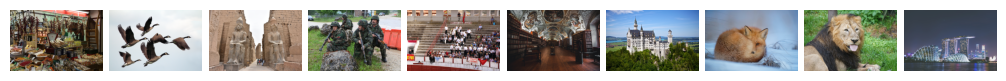

In [7]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Path to the directory containing images
image_dir = "dataset/quick_eval_pairwise"

# Get a list of all image file paths in the directory with plain names (no underscores)
image_files = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'gif')) and '_' not in f]

# Set the number of images per row for display
images_per_row = 10

# Calculate number of rows needed
num_images = len(image_files)
num_rows = (num_images + images_per_row - 1) // images_per_row

# Create a figure to display the thumbnails
plt.figure(figsize=(images_per_row, num_rows))

for i, image_path in enumerate(image_files):
    try:
        # Open the image and create a thumbnail
        img = Image.open(image_path)
        # img.thumbnail((32, 32))  # Set thumbnail size (32x32 pixels)

        # Add the image to the plot
        plt.subplot(num_rows, images_per_row, i + 1)
        plt.imshow(img)
        plt.axis('off')
    except Exception as e:
        print(f"Error loading {image_path}: {e}")

# Adjust layout and display the thumbnails
plt.tight_layout(pad=0.5)
plt.show()

flask/static/images/selected_256_RealESRGAN
flask/static/images/selected_256_SwinIR
flask/static/images/selected_256_ResShift
flask/static/images/selected_256
flask/static/images/selected_256_BSRGAN


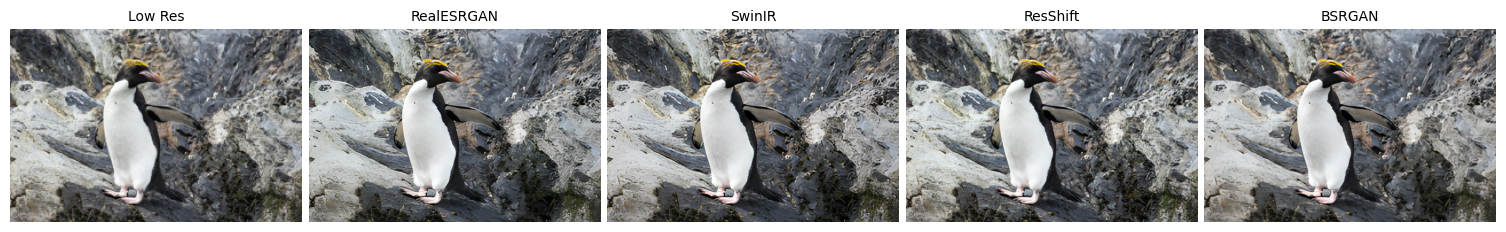

In [18]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Path to the parent directory containing subdirectories
parent_dir = "flask/static/images"

# Get subdirectories
subdirs = [os.path.join(parent_dir, d) for d in os.listdir(parent_dir) if os.path.isdir(os.path.join(parent_dir, d))]

# Collect the first image from each subdirectory
first_images = []
labels = []
for subdir in subdirs:
    image_files = [os.path.join(subdir, f) for f in os.listdir(subdir) if f.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'gif')) and f == "0801.png"]
    if image_files:
        print(subdir)
        if "flask/static/images/selected_256" == subdir:
            first_images.insert(0, image_files[0])  # Ensure "selected_256" is first
            labels.insert(0, "Low Res")  # Hard code label for "selected_256"
        else:
            first_images.append(image_files[0])  # Add the first image
            if "_" in subdir:
                labels.append(subdir.split("_")[-1])  # Extract model name from directory name
            else:
                labels.append("LR")  # Label the first as LR

# Set the number of images per row for display
images_per_row = 5

# Calculate number of rows needed
num_images = len(first_images)
num_rows = (num_images + images_per_row - 1) // images_per_row

# Create a figure to display the images
plt.figure(figsize=(images_per_row * 3, num_rows * 3))  # Adjust figure size for better visibility

for i, (image_path, label) in enumerate(zip(first_images, labels)):
    try:
        # Open the image
        img = Image.open(image_path)

        # Add the image to the plot
        plt.subplot(num_rows, images_per_row, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(label, fontsize=10)  # Add label as title
    except Exception as e:
        print(f"Error loading {image_path}: {e}")

# Adjust layout and display the images
plt.tight_layout(pad=0.5)
plt.show()

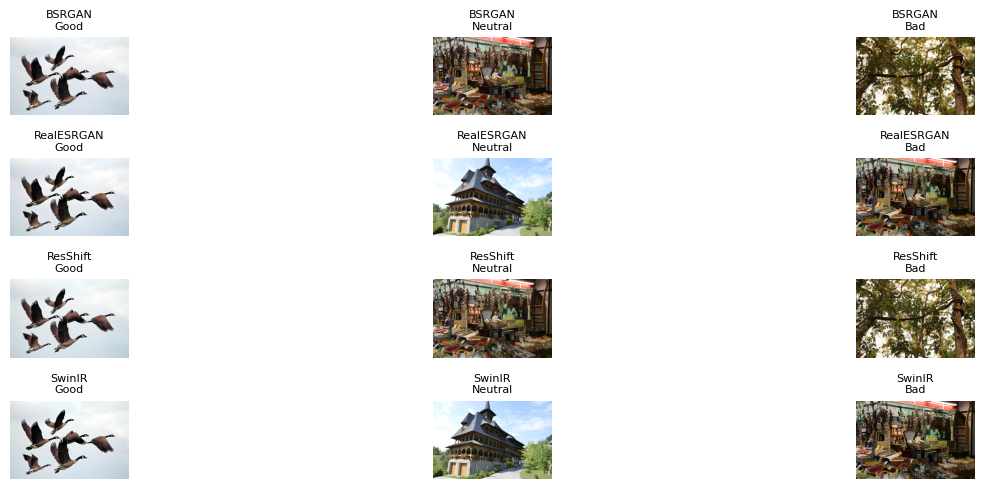

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os

def display_images_from_models(models_dirs, csv_path='per_image_metrics_and_categories.csv', categories=["Good", "Neutral", "Bad"]):
    """
    Displays example images from each model directory and category.
    
    Parameters:
    - models_dirs (dict): Dictionary mapping model names to their image directories.
    - csv_path (str): Path to the CSV file containing image data.
    - categories (list): List of categories to include.
    """
    # Read the CSV
    df = pd.read_csv(csv_path)
    
    # Filter the CSV to include only relevant categories
    filtered_df = df[df['Category'].isin(categories)]
    
    # Initialize a plot
    plt.figure(figsize=(15, 5))
    plot_idx = 1
    
    for model_name, model_dir in models_dirs.items():
        # Check if the model has any relevant entries
        model_df = filtered_df[filtered_df['Model'] == model_name]
        
        if model_df.empty:
            print(f"No entries found for model: {model_name}")
            continue
        
        # Iterate over the specified categories
        for category in categories:
            # Select one image per category for this model
            category_df = model_df[model_df['Category'] == category]
            
            if category_df.empty:
                print(f"No images found for category '{category}' in model '{model_name}'.")
                continue
            
            # Select the first image for simplicity
            img_name = category_df.iloc[0]['Image_Name']
            img_path = os.path.join(model_dir, img_name)
            
            if not os.path.exists(img_path):
                print(f"Image path '{img_path}' does not exist.")
                continue
            
            # Open and display the image
            try:
                img = Image.open(img_path).convert('RGB')
                plt.subplot(len(models_dirs), len(categories), plot_idx)
                plt.imshow(img)
                plt.title(f"{model_name}\n{category}", fontsize=8)
                plt.axis('off')
                plot_idx += 1
            except Exception as e:
                print(f"Error opening image {img_path}: {e}")
    
    plt.tight_layout()
    plt.show()

# Define models_dirs as per your setup
models_dirs = {
    "BSRGAN": "flask/static/images/selected_256_BSRGAN",
    "RealESRGAN": "flask/static/images/selected_256_RealESRGAN",
    "ResShift": "flask/static/images/selected_256_ResShift",
    "SwinIR": "flask/static/images/selected_256_SwinIR",
}

# Call the function to display images
display_images_from_models(models_dirs, csv_path='per_image_metrics_and_categories.csv')


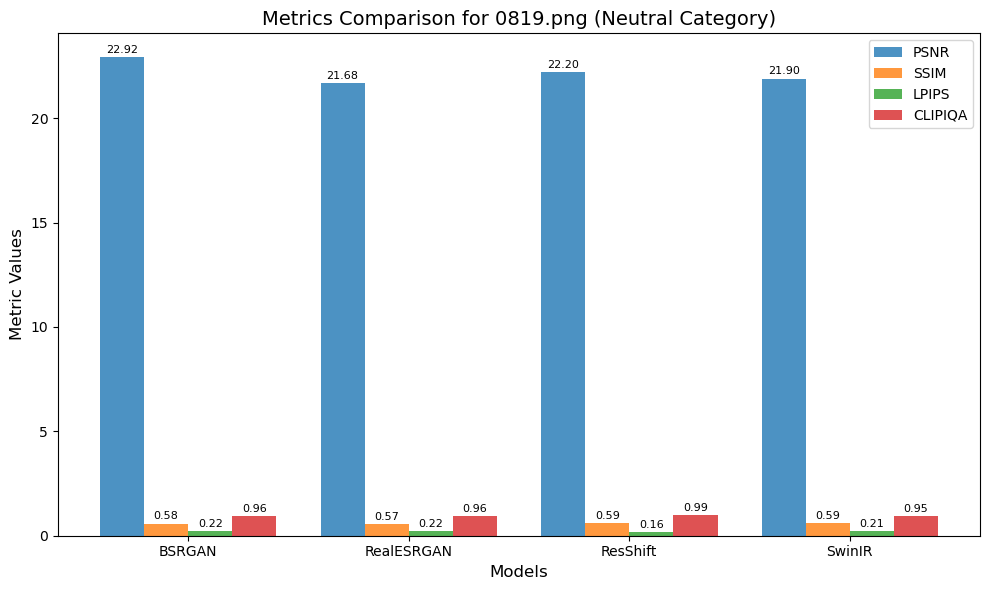

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ["BSRGAN", "RealESRGAN", "ResShift", "SwinIR"]
psnr = [22.91962250079709, 21.68332172934838, 22.20497585960431, 21.895786412988944]
ssim = [0.581834601575994, 0.5730176848412684, 0.5900262760311151, 0.5901948840945636]
lpips = [0.21567979454994202, 0.21828901767730713, 0.16157874464988708, 0.2125578373670578]
clipiqa = [0.9560546875, 0.9580078125, 0.98974609375, 0.9521484375]

# Create the plot
x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - 1.5 * width, psnr, width, label='PSNR', alpha=0.8)
bar2 = ax.bar(x - 0.5 * width, ssim, width, label='SSIM', alpha=0.8)
bar3 = ax.bar(x + 0.5 * width, lpips, width, label='LPIPS', alpha=0.8)
bar4 = ax.bar(x + 1.5 * width, clipiqa, width, label='CLIPIQA', alpha=0.8)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Metric Values', fontsize=12)
ax.set_title('Metrics Comparison for 0819.png (Neutral Category)', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=10)
ax.legend()

# Annotate bars with values
for bar_group in [bar1, bar2, bar3, bar4]:
    for bar in bar_group:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', fontsize=8)

# Show the plot
plt.tight_layout()
plt.show()


Filtered dataframe shape: (3, 7)
No images found for category 'Good' in model 'BSRGAN'.
No images found for category 'Bad' in model 'BSRGAN'.
No images found for category 'Good' in model 'RealESRGAN'.
No images found for category 'Bad' in model 'RealESRGAN'.
No entries found for model: ResShift
No images found for category 'Good' in model 'SwinIR'.
No images found for category 'Bad' in model 'SwinIR'.


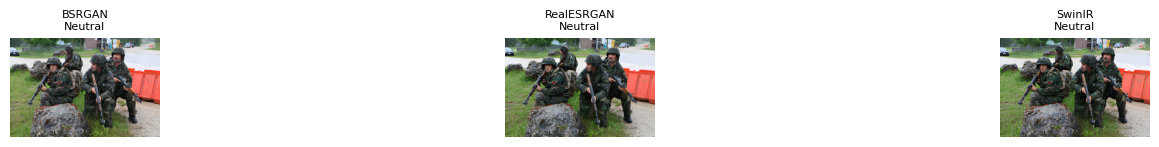

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os

def display_images_with_thresholds(models_dirs, csv_path='per_image_metrics_and_categories.csv', 
                                   categories=["Good", "Neutral", "Bad"], 
                                   ssim_thresh=0.6, lpips_thresh=0.2, clipiqa_thresh=0.96):
    """
    Displays example images from each model directory and category, applying thresholds for filtering.
    
    Parameters:
    - models_dirs (dict): Dictionary mapping model names to their image directories.
    - csv_path (str): Path to the CSV file containing image data.
    - categories (list): List of categories to include.
    - ssim_thresh (float): Maximum SSIM threshold.
    - lpips_thresh (float): Minimum LPIPS threshold.
    - clipiqa_thresh (float): Maximum CLIPIQA threshold.
    """
    # Read the CSV
    df = pd.read_csv(csv_path)
    
    # Apply thresholds for filtering
    filtered_df = df[
        (df['SSIM'] < ssim_thresh) &
        (df['LPIPS'] > lpips_thresh) &
        (df['CLIPIQA'] < clipiqa_thresh)
    ]
    print(f"Filtered dataframe shape: {filtered_df.shape}")
    
    # Further filter the DataFrame to include only relevant categories
    filtered_df = filtered_df[filtered_df['Category'].isin(categories)]
    
    # Initialize a plot
    plt.figure(figsize=(15, 5))
    plot_idx = 1
    
    for model_name, model_dir in models_dirs.items():
        # Check if the model has any relevant entries
        model_df = filtered_df[filtered_df['Model'] == model_name]
        
        if model_df.empty:
            print(f"No entries found for model: {model_name}")
            continue
        
        # Iterate over the specified categories
        for category in categories:
            # Select one image per category for this model
            category_df = model_df[model_df['Category'] == category]
            
            if category_df.empty:
                print(f"No images found for category '{category}' in model '{model_name}'.")
                continue
            
            # Select the first image for simplicity
            img_name = category_df.iloc[0]['Image_Name']
            img_path = os.path.join(model_dir, img_name)
            
            if not os.path.exists(img_path):
                print(f"Image path '{img_path}' does not exist.")
                continue
            
            # Open and display the image
            try:
                img = Image.open(img_path).convert('RGB')
                plt.subplot(len(models_dirs), len(categories), plot_idx)
                plt.imshow(img)
                plt.title(f"{model_name}\n{category}", fontsize=8)
                plt.axis('off')
                plot_idx += 1
            except Exception as e:
                print(f"Error opening image {img_path}: {e}")
    
    plt.tight_layout()
    plt.show()

# Define models_dirs as per your setup
models_dirs = {
    "BSRGAN": "flask/static/images/selected_256_BSRGAN",
    "RealESRGAN": "flask/static/images/selected_256_RealESRGAN",
    "ResShift": "flask/static/images/selected_256_ResShift",
    "SwinIR": "flask/static/images/selected_256_SwinIR",
}

# Call the function to display images with thresholds
display_images_with_thresholds(models_dirs, csv_path='per_image_metrics_and_categories.csv')


Filtered dataframe shape: (10, 7)


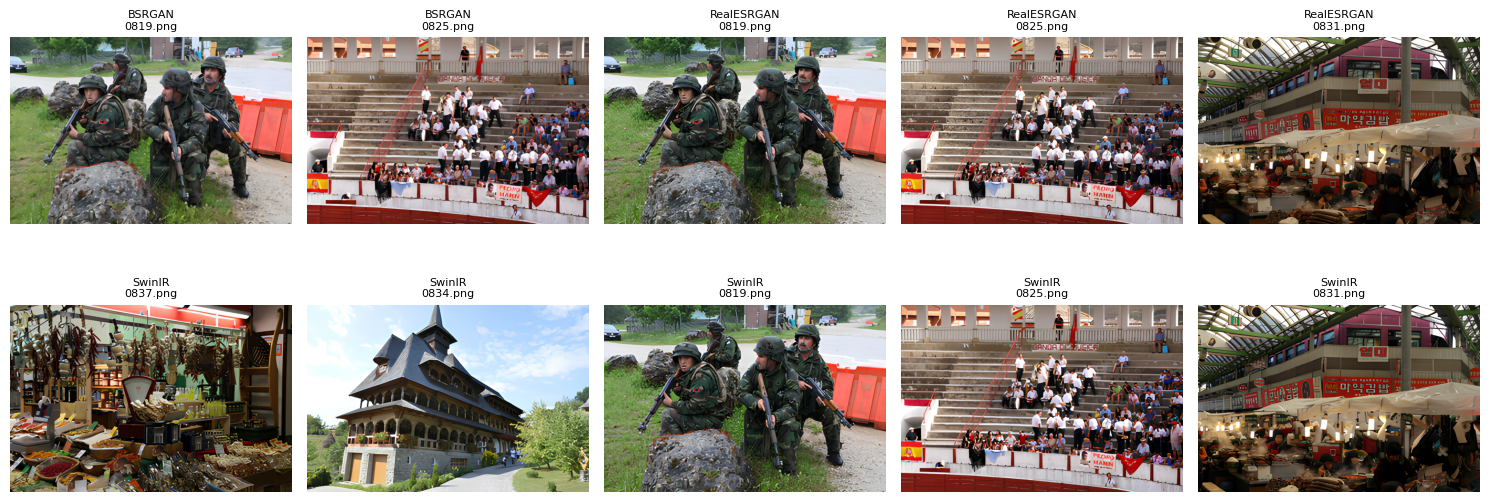

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os

def display_all_filtered_images(models_dirs, csv_path='per_image_metrics_and_categories.csv', 
                                psnr_thresh=24.0, ssim_thresh=0.7, lpips_thresh=0.15, clipiqa_thresh=0.96):
    df = pd.read_csv(csv_path)
    filtered_df = df[
        (df['PSNR'] < psnr_thresh) &
        (df['SSIM'] < ssim_thresh) &
        (df['LPIPS'] > lpips_thresh) &
        (df['CLIPIQA'] < clipiqa_thresh)
    ]
    print(f"Filtered dataframe shape: {filtered_df.shape}")
    
    if filtered_df.empty:
        print("No images meet the specified thresholds.")
        return
    
    num_images = len(filtered_df)
    max_columns = 5
    num_rows = (num_images + max_columns - 1) // max_columns
    
    plt.figure(figsize=(max_columns * 3, num_rows * 3))
    plot_idx = 1
    
    for _, row in filtered_df.iterrows():
        model_name = row['Model']
        img_name = row['Image_Name']
        model_dir = models_dirs.get(model_name, "")
        if not model_dir:
            continue
        img_path = os.path.join(model_dir, img_name)
        if not os.path.exists(img_path):
            continue
        
        try:
            img = Image.open(img_path).convert('RGB')
            plt.subplot(num_rows, max_columns, plot_idx)
            plt.imshow(img)
            plt.title(f"{model_name}\n{img_name}", fontsize=8)
            plt.axis('off')
            plot_idx += 1
        except Exception as e:
            print(f"Error opening image {img_path}: {e}")
    
    plt.tight_layout()
    plt.show()

models_dirs = {
    "BSRGAN": "flask/static/images/selected_256_BSRGAN",
    "RealESRGAN": "flask/static/images/selected_256_RealESRGAN",
    "ResShift": "flask/static/images/selected_256_ResShift",
    "SwinIR": "flask/static/images/selected_256_SwinIR",
}

display_all_filtered_images(models_dirs, csv_path='per_image_metrics_and_categories.csv')


PSNR Stats:
count    120.000000
mean      24.187757
std        3.123536
min       17.619624
25%       21.984267
50%       23.866823
75%       26.603044
max       32.276880
Name: PSNR, dtype: float64

SSIM Stats:
count    120.000000
mean       0.707161
std        0.109005
min        0.472838
25%        0.627126
50%        0.697551
75%        0.789382
max        0.940013
Name: SSIM, dtype: float64

LPIPS Stats:
count    120.000000
mean       0.160345
std        0.053079
min        0.045298
25%        0.121895
50%        0.165507
75%        0.199354
max        0.272267
Name: LPIPS, dtype: float64

CLIPIQA Stats:
count    120.000000
mean       0.975671
std        0.018018
min        0.876953
25%        0.970215
50%        0.981445
75%        0.985962
max        0.996094
Name: CLIPIQA, dtype: float64


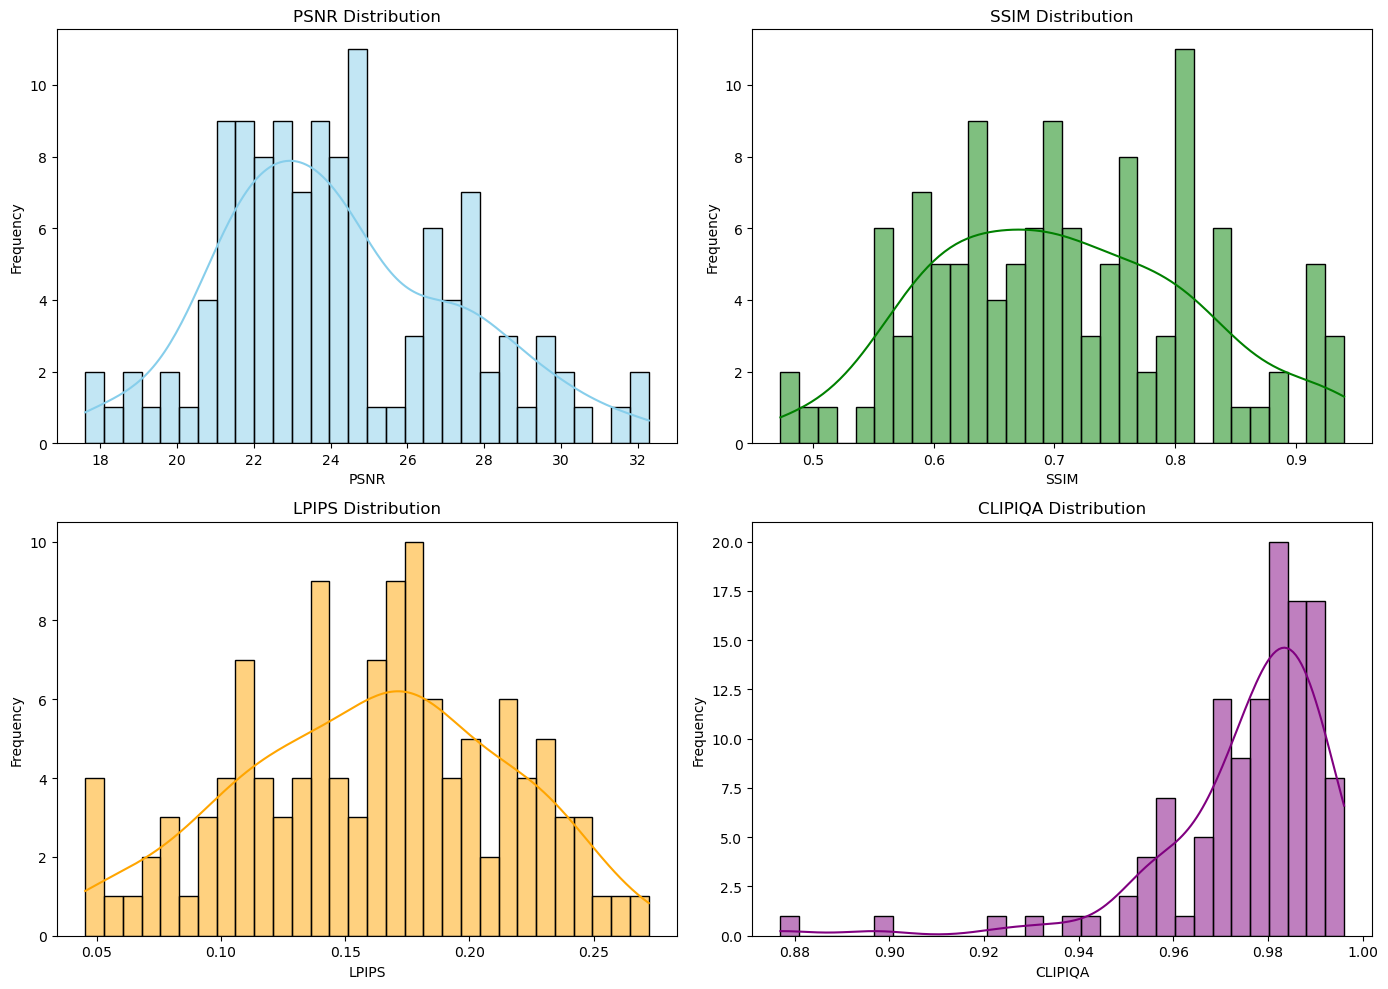

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV data
df = pd.read_csv("per_image_metrics_and_categories.csv")

# Display basic statistics for all metrics
print("PSNR Stats:")
print(df['PSNR'].describe())
print("\nSSIM Stats:")
print(df['SSIM'].describe())
print("\nLPIPS Stats:")
print(df['LPIPS'].describe())
print("\nCLIPIQA Stats:")
print(df['CLIPIQA'].describe())

# Create a 2x2 subplot for the metrics
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# PSNR Distribution
sns.histplot(df['PSNR'], bins=30, kde=True, color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title('PSNR Distribution')
axes[0, 0].set_xlabel('PSNR')
axes[0, 0].set_ylabel('Frequency')

# SSIM Distribution
sns.histplot(df['SSIM'], bins=30, kde=True, color='green', ax=axes[0, 1])
axes[0, 1].set_title('SSIM Distribution')
axes[0, 1].set_xlabel('SSIM')
axes[0, 1].set_ylabel('Frequency')

# LPIPS Distribution
sns.histplot(df['LPIPS'], bins=30, kde=True, color='orange', ax=axes[1, 0])
axes[1, 0].set_title('LPIPS Distribution')
axes[1, 0].set_xlabel('LPIPS')
axes[1, 0].set_ylabel('Frequency')

# CLIPIQA Distribution
sns.histplot(df['CLIPIQA'], bins=30, kde=True, color='purple', ax=axes[1, 1])
axes[1, 1].set_title('CLIPIQA Distribution')
axes[1, 1].set_xlabel('CLIPIQA')
axes[1, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()
